# Circular Trajectory 

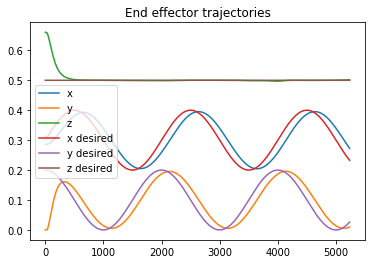

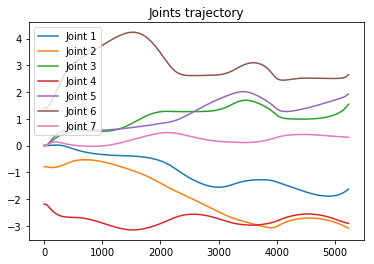

In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('../../hw2/controller4.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_posx = []
    t_posy = []
    t_posz = []
    t = []
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    xdx = []
    xdy = []
    xdz = []
    for row in readCSV:
        t_posx.append(float(row[0]))
        t_posy.append(float(row[1]))
        t_posz.append(float(row[2]))
        t1.append(float(row[3]))
        t2.append(float(row[4]))
        t3.append(float(row[5]))
        t4.append(float(row[6]))
        t5.append(float(row[7]))
        t6.append(float(row[8]))
        t7.append(float(row[9]))
        xdx.append(float(row[10]))
        xdy.append(float(row[11]))
        xdz.append(float(row[12]))
plt.plot(t_posx, label="x")
plt.plot(t_posy, label="y")
plt.plot(t_posz, label="z")
plt.plot(xdx, label="x desired")
plt.plot(xdy, label="y desired")
plt.plot(xdz, label="z desired")
plt.title("End effector trajectories")
plt.legend()
plt.show()
plt.plot(t1, label = "Joint 1")
plt.plot(t2, label = "Joint 2")
plt.plot(t3, label = "Joint 3")
plt.plot(t4, label = "Joint 4")
plt.plot(t5, label = "Joint 5")
plt.plot(t6, label = "Joint 6")
plt.plot(t7, label = "Joint 7")
plt.title("Joints trajectory")
plt.legend()
plt.show()

We can see that x and y have sinusoidal trajectories and z has the desired position. However, the robot is still falling. We can see it for joints 1 and 2 where their angles go to -90. 

# Circular trajectories without space mass matrix

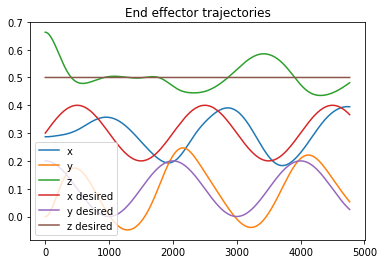

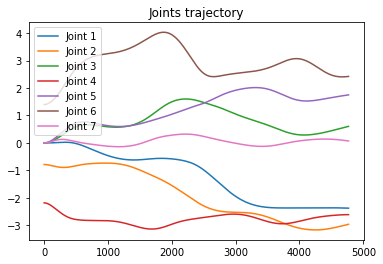

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('../../hw2/controller4.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_posx = []
    t_posy = []
    t_posz = []
    t = []
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    xdx = []
    xdy = []
    xdz = []
    for row in readCSV:
        t_posx.append(float(row[0]))
        t_posy.append(float(row[1]))
        t_posz.append(float(row[2]))
        t1.append(float(row[3]))
        t2.append(float(row[4]))
        t3.append(float(row[5]))
        t4.append(float(row[6]))
        t5.append(float(row[7]))
        t6.append(float(row[8]))
        t7.append(float(row[9]))
        xdx.append(float(row[10]))
        xdy.append(float(row[11]))
        xdz.append(float(row[12]))
plt.plot(t_posx, label="x")
plt.plot(t_posy, label="y")
plt.plot(t_posz, label="z")
plt.plot(xdx, label="x desired")
plt.plot(xdy, label="y desired")
plt.plot(xdz, label="z desired")
plt.title("End effector trajectories")
plt.legend()
plt.show()
plt.plot(t1, label = "Joint 1")
plt.plot(t2, label = "Joint 2")
plt.plot(t3, label = "Joint 3")
plt.plot(t4, label = "Joint 4")
plt.plot(t5, label = "Joint 5")
plt.plot(t6, label = "Joint 6")
plt.plot(t7, label = "Joint 7")
plt.title("Joints trajectory")
plt.legend()
plt.show()

I used the controller from Problem 3 without using the Lambda matrix:
$$p = \overline{J}^Tg$$
$$F = k_p(x_d - x) - kv* \ddot{x} + p$$
$$\Gamma = J_v^T F - N^TMK_{vj}\dot{q}$$
As we do not compensate for the mass, the end-effector trajectory is modified, the sinusoids are not regular. Z trajectory is clearly not constant, the dynamics is completely disturbed.

# Circular trajectory with PD Controller

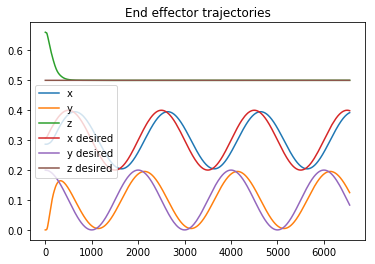

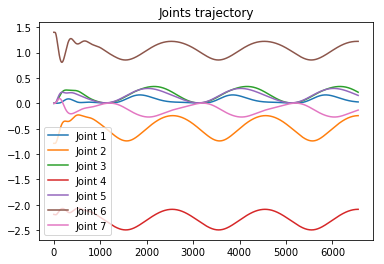

In [4]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('../../hw2/controller4.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_posx = []
    t_posy = []
    t_posz = []
    t = []
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    xdx = []
    xdy = []
    xdz = []
    for row in readCSV:
        t_posx.append(float(row[0]))
        t_posy.append(float(row[1]))
        t_posz.append(float(row[2]))
        t1.append(float(row[3]))
        t2.append(float(row[4]))
        t3.append(float(row[5]))
        t4.append(float(row[6]))
        t5.append(float(row[7]))
        t6.append(float(row[8]))
        t7.append(float(row[9]))
        xdx.append(float(row[10]))
        xdy.append(float(row[11]))
        xdz.append(float(row[12]))
plt.plot(t_posx, label="x")
plt.plot(t_posy, label="y")
plt.plot(t_posz, label="z")
plt.plot(xdx, label="x desired")
plt.plot(xdy, label="y desired")
plt.plot(xdz, label="z desired")
plt.title("End effector trajectories")
plt.legend()
plt.show()
plt.plot(t1, label = "Joint 1")
plt.plot(t2, label = "Joint 2")
plt.plot(t3, label = "Joint 3")
plt.plot(t4, label = "Joint 4")
plt.plot(t5, label = "Joint 5")
plt.plot(t6, label = "Joint 6")
plt.plot(t7, label = "Joint 7")
plt.title("Joints trajectory")
plt.legend()
plt.show()

We added a PD Controller to smooth the joints trajectory and make it as close as possible to 0. 
$$p = \overline{J}^Tg$$
$$F = \Lambda(k_p(x_d - x) - kv* \ddot{x}) + p$$
$$\Gamma = J_v^T F - N^TM(K_{pj}(q - q_d) + K_{vj}\dot{q})$$
We can see the results on the joints trajectory, it prevents the robot from falling.

# Circular trajectories with gravity compensation

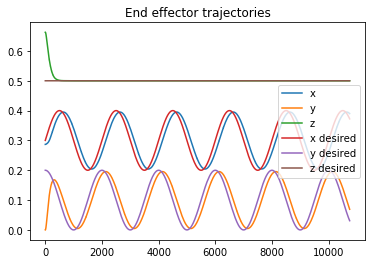

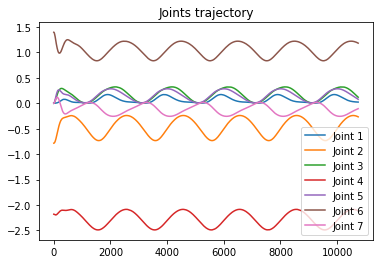

In [13]:
import csv
import matplotlib.pyplot as plt
import numpy as np

with open('../../hw2/controller4.txt') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    t_posx = []
    t_posy = []
    t_posz = []
    t = []
    t1 = []
    t2 = []
    t3 = []
    t4 = []
    t5 = []
    t6 = []
    t7 = []
    xdx = []
    xdy = []
    xdz = []
    for row in readCSV:
        t_posx.append(float(row[0]))
        t_posy.append(float(row[1]))
        t_posz.append(float(row[2]))
        t1.append(float(row[3]))
        t2.append(float(row[4]))
        t3.append(float(row[5]))
        t4.append(float(row[6]))
        t5.append(float(row[7]))
        t6.append(float(row[8]))
        t7.append(float(row[9]))
        xdx.append(float(row[10]))
        xdy.append(float(row[11]))
        xdz.append(float(row[12]))
plt.plot(t_posx, label="x")
plt.plot(t_posy, label="y")
plt.plot(t_posz, label="z")
plt.plot(xdx, label="x desired")
plt.plot(xdy, label="y desired")
plt.plot(xdz, label="z desired")
plt.title("End effector trajectories")
plt.legend()
plt.show()
plt.plot(t1, label = "Joint 1")
plt.plot(t2, label = "Joint 2")
plt.plot(t3, label = "Joint 3")
plt.plot(t4, label = "Joint 4")
plt.plot(t5, label = "Joint 5")
plt.plot(t6, label = "Joint 6")
plt.plot(t7, label = "Joint 7")
plt.title("Joints trajectory")
plt.legend()
plt.show()

In this case, with the gravity compensation, the sinusoidal trajectories are really smooth and the joints trajectory have small variations.
$$F = \Lambda(k_p(x_d - x) - kv* \ddot{x})$$
$$\Gamma = J_v^T F + g- N^TM(K_{pj}(q - q_d) + K_{vj}\dot{q})$$